## Notebook 3 : Correlations and relationship between variables

## 1 - Introduction ##

Overview of the notebook’s objective and the data used.


In [1]:
#### EXPLORING THE DATASET ####
import pandas as pd

# Read in the data
df_rv = pd.read_csv('df_complete.csv')

df_rv.head()

/var/folders/4w/14ckvblj1yxd9ft8451k6lhc0000gn/T/ipykernel_24483/2174705646.py:5: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_rv = pd.read_csv('df_complete.csv')


,Date mutation,Nature mutation,Valeur fonciere,Voie,Code postal,Commune,Code departement,Code commune,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain,annee
0,2019-01-07 00:00:00.000000000,Vente,244200.0,COMMANDANT COUSTEAU,1000.0,BOURG-EN-BRESSE,1,53,0,1.0,Maison,150.0,5.0,695.0,2019
1,2019-04-07 00:00:00.000000000,Vente,195000.0,DE LA CROIX ROSIER,1250.0,HAUTECOURT-ROMANECHE,1,184,0,1.0,Maison,94.0,4.0,888.0,2019
2,2019-04-07 00:00:00.000000000,Vente,195000.0,DE LA CROIX ROSIER,1250.0,HAUTECOURT-ROMANECHE,1,184,0,1.0,Maison,94.0,4.0,500.0,2019
3,2019-04-07 00:00:00.000000000,Vente,110030.0,LA VILLE,1250.0,GRAND-CORENT,1,177,0,1.0,Maison,90.0,3.0,522.0,2019
4,2019-03-07 00:00:00.000000000,Vente,160450.0,CHARBONNET,1270.0,COLIGNY,1,108,0,0.0,0,0.0,0.0,8.0,2019


In [2]:
#### CONVERTS TO THE RIGHT TYPE ####

category_convert = ['Nature mutation', 'Voie', 'Code postal', 'Commune', 'Code departement', 'Code commune', 'Code type local', 'Type local']
df_rv[category_convert] = df_rv[category_convert].astype('category')

df_rv['Date mutation'] = pd.to_datetime(df_rv['Date mutation'], errors = 'coerce')
df_rv['Date mutation'] = df_rv['Date mutation'].interpolate(method='linear')

df_rv['Valeur fonciere']=df_rv['Valeur fonciere'].replace({'\xa0':'',',':'.'}, regex=True)
df_rv['Valeur fonciere']=pd.to_numeric(df_rv['Valeur fonciere'], errors='coerce')

df_rv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17810875 entries, 0 to 17810874
Data columns (total 15 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   Date mutation              datetime64[ns]
 1   Nature mutation            category      
 2   Valeur fonciere            float64       
 3   Voie                       category      
 4   Code postal                category      
 5   Commune                    category      
 6   Code departement           category      
 7   Code commune               category      
 8   Nombre de lots             int64         
 9   Code type local            category      
 10  Type local                 category      
 11  Surface reelle bati        float64       
 12  Nombre pieces principales  float64       
 13  Surface terrain            float64       
 14  annee                      int64         
dtypes: category(8), datetime64[ns](1), float64(4), int64(2)
memory usage: 1.2 GB


In [3]:
#### CHECK MISSING VALUES ####
df_rv.isnull().sum()

Date mutation                0
Nature mutation              0
Valeur fonciere              0
Voie                         0
Code postal                  0
Commune                      0
Code departement             0
Code commune                 0
Nombre de lots               0
Code type local              0
Type local                   0
Surface reelle bati          0
Nombre pieces principales    0
Surface terrain              0
annee                        0
dtype: int64

In [4]:
#### CHECK DUPLICATES ####
#df_rv.drop_duplicates(keep='last', inplace=True)
df_rv.duplicated().sum()

0

In [49]:
df_rv.head()

,Date mutation,Nature mutation,Valeur fonciere,Voie,Code postal,Commune,Code departement,Code commune,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain,annee
0,2019-01-07,Vente,244200.0,COMMANDANT COUSTEAU,1000.0,BOURG-EN-BRESSE,1,53,0,1.0,Maison,150.0,5.0,695.0,2019
1,2019-04-07,Vente,195000.0,DE LA CROIX ROSIER,1250.0,HAUTECOURT-ROMANECHE,1,184,0,1.0,Maison,94.0,4.0,888.0,2019
2,2019-04-07,Vente,195000.0,DE LA CROIX ROSIER,1250.0,HAUTECOURT-ROMANECHE,1,184,0,1.0,Maison,94.0,4.0,500.0,2019
3,2019-04-07,Vente,110030.0,LA VILLE,1250.0,GRAND-CORENT,1,177,0,1.0,Maison,90.0,3.0,522.0,2019
4,2019-03-07,Vente,160450.0,CHARBONNET,1270.0,COLIGNY,1,108,0,0.0,0,0.0,0.0,8.0,2019


## 2 - Methodology ##

Explanation of the analysis methods and visualizations.

Data Exploration:
- Analyze correlations between various variables (price vs. surface area, price vs. number of rooms, etc.).
- Study how certain factors (terrain size, property type) affect property values.

In [5]:
#### LIBRARIES ####
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
import random



In [6]:

#### SEPARATE OUTLIERS WITH IQR ####
Q1 = df_rv['Valeur fonciere'].quantile(0.25)
Q3 = df_rv['Valeur fonciere'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_rv[(df_rv['Valeur fonciere'] < lower_bound) | (df_rv['Valeur fonciere'] > upper_bound)].copy()
non_outliers = df_rv[(df_rv['Valeur fonciere'] >= lower_bound) & (df_rv['Valeur fonciere'] <= upper_bound)].copy()

outliers.head()

,Date mutation,Nature mutation,Valeur fonciere,Voie,Code postal,Commune,Code departement,Code commune,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain,annee
116,2019-03-07 00:00:00.000000000,Vente,3000000.0,DES ORMEAUX,1000.0,BOURG-EN-BRESSE,1,53,0,0.0,0,0.0,0.0,4253.0,2019
117,2019-03-07 00:00:00.000000000,Vente,3000000.0,MARECHAL JUIN,1000.0,BOURG-EN-BRESSE,1,53,0,4.0,Local industriel. commercial ou assimilé,2465.0,0.0,5926.0,2019
1059,2019-05-22 21:49:05.454545408,Vente,625000.0,GABRIEL VICAIRE,1160.0,PONT-D AIN,1,304,0,4.0,Local industriel. commercial ou assimilé,850.0,0.0,2108.0,2019
1060,2019-05-03 15:16:21.818181888,Vente,625000.0,GABRIEL VICAIRE,1160.0,PONT-D AIN,1,304,0,0.0,0,0.0,0.0,236.0,2019
1061,2019-04-14 08:43:38.181818112,Vente,625000.0,GABRIEL VICAIRE,1160.0,PONT-D AIN,1,304,0,4.0,Local industriel. commercial ou assimilé,80.0,0.0,982.0,2019


In [7]:
non_outliers.head()
non_outliers['Nature mutation'].unique()
non_outliers[non_outliers['Code departement']==976].head()



,Date mutation,Nature mutation,Valeur fonciere,Voie,Code postal,Commune,Code departement,Code commune,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain,annee


Data exploration of multivariable : ungraphical and graphical variable

In [8]:
# Statistique data of non_outliers
colummns_stat = ['Valeur fonciere','Surface reelle bati','Surface terrain']
mean = non_outliers[colummns_stat].mean()
maxi = non_outliers[colummns_stat].max()
mini = non_outliers[colummns_stat].min()
median = non_outliers[colummns_stat].median()

stat_columns = pd.DataFrame({
    'mean': mean,
    'median': median,
    'max': maxi,
    'min': mini
})
stat_columns.index.name='feature name'

stat_columns.head()
##############Dois-je effacé les ligne avec valeur foncière = 0#################

,mean,median,max,min
feature name,,,,
Valeur fonciere,163822.060283,138650.0,606250.0,0.0
Surface reelle bati,36.465759,0.0,450000.0,0.0
Surface terrain,1829.699058,287.0,10723091.0,0.0


In [9]:
# Statistique data of outliers
colummns_stat_outliers = ['Valeur fonciere','Surface reelle bati','Surface terrain']
mean = outliers[colummns_stat].mean()
maxi = outliers[colummns_stat].max()
mini = outliers[colummns_stat].min()
median = outliers[colummns_stat].median()

colummns_stat_outliers = pd.DataFrame({
    'mean': mean,
    'median': median,
    'max': maxi,
    'min': mini
})
colummns_stat_outliers.index.name='feature name'

colummns_stat_outliers.head()

,mean,median,max,min
feature name,,,,
Valeur fonciere,5.559429e+06,1030000.0,1.415000e+10,606255.0
Surface reelle bati,1.446187e+02,0.0,3.129620e+05,0.0
Surface terrain,3.797640e+03,500.0,6.032439e+06,0.0


### Which point is important for an investor ?
   * A good price : If the land value is below the market average, it can give a higher added value potential

        - Which type of good is the best to invest (historigramme per type location) ?

        - Look at the type of local that are the best to invest.
             * Do you want to invest in empty area ?  
           If empty area is in there, make a comparaison in fonction of the surface
             * Those are the area with a land value below the average price in function of the surface area. Is there a goods with the same scale of surface but with a construction ?
           Look other type that are in the plage of surfaces below the mean_land_price

        - OK, those goods same to be a better investment than empty area because I just have to pay the renovation:
             * But wich type of building should I invest in ?
            Look a the building in function of the surface of the building (Compare the price with the bigger building. If some have the same height but are cheaper, keep the cheaper. And look at other why they don't have the same price)

        - Those one have the same plage of surfaces et the added value is good. Why this difference in price ?
            * Look at the number of main room *****************

        - I want to look at the building that are above and below the median surfaces and compare it with the tax transfère.
           * Calculate the transfert tax and add a columns with the sum of tax and added value.
           * Wich of the bigger building have less taxes ? Wich of the smaller building have less taxes ?

        - If you just take the price into account you will have all those small building but you also have those bigger building with the smaller taxes.
           * Compare in a heat map the quality of the good in function of the price_sum and surface.
           * Look if there is bigger building (x) that have the same plage of price (near the median) as smaller building (o)
           * Differenciate the type of local by color

### Analyse of the tax transfert
Calcule du droit de mutation en fonction de la nature de la mutation.

- For those type of mutation (case 1) : 'Vente', 'Echange', 'Vente terrain à bâtir', 'Adjudication'

   * Formule generale (For all departments) : Valeur foncière x (4.5% + 1.2%) x 1.0237
   * Formule exception (departemnt : 36, 56) : Valeur foncière x (3.8% + 1.2%) x 1.0237

- For those type of mutation (case 2) : 'Vente en l'état futur d'achèvement'
   * Formule generale (For all departments) : Valeur foncière x 0.715%

- For those type of mutation (case 3) : 'Expropriation'
   * Vari in function of the type of exportation:
       - Formule generale (For all departments) + Formule exception (departemnt : 36, 56)
       - Delete the tax
       - Reduce the tax



In [ ]:
#Calcul the tax transfert

#List of columns in function of the different case
columns_c1 = ['Vente', 'Echange', 'Vente terrain à bâtir', 'Adjudication']
columns_c2 = ["Vente en l'état futur d'achèvement"]

def tax_transfert_exp_null(df):

    #Columns that can change the formula
    valeur_fonciere = df['Valeur fonciere']
    code_dept = df['Code departement']
    nature_mutation = df['Nature mutation']

    #Calculate tax
    tax_dept = 4.5/100 if code_dept not in [36, 56] else 3.8/100
    tax_comm = 1.2/100

    if nature_mutation in columns_c1:
        return valeur_fonciere * (tax_dept + tax_comm) * 1.0237
    elif nature_mutation in columns_c2:
        return valeur_fonciere * 0.715/100
    else :
        return 0
    
non_outliers['Droit de mutation'] = outliers.apply(tax_transfert_exp_null, axis=1)

non_outliers['Droit de mutation'] = non_outliers.apply(tax_transfert_exp_null, axis=1)
non_outliers.head()

,Date mutation,Nature mutation,Valeur fonciere,Voie,Code postal,Commune,Code departement,Code commune,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain,annee,Droit de mutation
0,2019-01-07,Vente,244200.0,COMMANDANT COUSTEAU,1000.0,BOURG-EN-BRESSE,1,53,0,1.0,Maison,150.0,5.0,695.0,2019,14249.289780
1,2019-04-07,Vente,195000.0,DE LA CROIX ROSIER,1250.0,HAUTECOURT-ROMANECHE,1,184,0,1.0,Maison,94.0,4.0,888.0,2019,11378.425500
2,2019-04-07,Vente,195000.0,DE LA CROIX ROSIER,1250.0,HAUTECOURT-ROMANECHE,1,184,0,1.0,Maison,94.0,4.0,500.0,2019,11378.425500
3,2019-04-07,Vente,110030.0,LA VILLE,1250.0,GRAND-CORENT,1,177,0,1.0,Maison,90.0,3.0,522.0,2019,6420.349527
4,2019-03-07,Vente,160450.0,CHARBONNET,1270.0,COLIGNY,1,108,0,0.0,0,0.0,0.0,8.0,2019,9362.401905


In [11]:
outliers['Droit de mutation'] = outliers.apply(tax_transfert_exp_null, axis=1)
outliers.head()

,Date mutation,Nature mutation,Valeur fonciere,Voie,Code postal,Commune,Code departement,Code commune,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain,annee,Droit de mutation
116,2019-03-07 00:00:00.000000000,Vente,3000000.0,DES ORMEAUX,1000.0,BOURG-EN-BRESSE,1,53,0,0.0,0,0.0,0.0,4253.0,2019,175052.7000
117,2019-03-07 00:00:00.000000000,Vente,3000000.0,MARECHAL JUIN,1000.0,BOURG-EN-BRESSE,1,53,0,4.0,Local industriel. commercial ou assimilé,2465.0,0.0,5926.0,2019,175052.7000
1059,2019-05-22 21:49:05.454545408,Vente,625000.0,GABRIEL VICAIRE,1160.0,PONT-D AIN,1,304,0,4.0,Local industriel. commercial ou assimilé,850.0,0.0,2108.0,2019,36469.3125
1060,2019-05-03 15:16:21.818181888,Vente,625000.0,GABRIEL VICAIRE,1160.0,PONT-D AIN,1,304,0,0.0,0,0.0,0.0,236.0,2019,36469.3125
1061,2019-04-14 08:43:38.181818112,Vente,625000.0,GABRIEL VICAIRE,1160.0,PONT-D AIN,1,304,0,4.0,Local industriel. commercial ou assimilé,80.0,0.0,982.0,2019,36469.3125


## 3 - Results ##

Presentation of the analyses, visualizations, and findings.

Visualizations:
- Heatmap of correlations between variables.
- Scatter plots to visualize relationships between certain variables, such as built area and property value.

Analyse the value price in function of the surface of the area

In [41]:
# Analysis for an item without building
# Analysis for anitem with building
  #change the size in function of the surface
''' 1. Comparaison du prix en fonction de la taille du terrain et de si il es vide ou pas
    *2. Comparaison de la valeur d'un terrain vide en fonction de sa surface et du département et de la commune
    *3. Comparaison de la valeur d'un terrain vide en fonction de sa surface et de la voie
    
    *******Faire un tableau interractif de la valeur d'un terrain vide en fonction de sa surface et y ajouter des
    option pour ajouter ou retirer les vue suivantes : voie, commune département. Ajouter une option pour mettre une ligne qui traverse
    le graph sur la moyen de la valeur foncière.************

    *4. Comparaison de la valeur d'un terrain non vide en fonction de la surface réelle et de la taille des batiments.
    *5. Comparaison de la valeur d'un terrain non vide en fonction de la surface réelle , de la taille du batiment et du nombre de pièce, type du local
    *6. Comparaison simultannné entre les terrain non vide des différentes années

    *******Faire un graphique interractif de la valeur d'un terrain non vide en fonction de la surface du terrain et de la surface du batîment. Mettre des options 
    pour ajouter ou retirer les vues suivantes: nombre de pièce, type de local, année (par année ou tous)*****
'''


" 1. Comparaison du prix en fonction de la taille du terrain et de si il es vide ou pas\n    *2. Comparaison de la valeur d'un terrain vide en fonction de sa surface et du département et de la commune\n    *3. Comparaison de la valeur d'un terrain vide en fonction de sa surface et de la voie\n    \n    *******Faire un tableau interractif de la valeur d'un terrain vide en fonction de sa surface et y ajouter des\n    option pour ajouter ou retirer les vue suivantes : voie, commune département. Ajouter une option pour mettre une ligne qui traverse\n    le graph sur la moyen de la valeur foncière.************\n\n    *4. Comparaison de la valeur d'un terrain non vide en fonction de la surface réelle et de la taille des batiments.\n    *5. Comparaison de la valeur d'un terrain non vide en fonction de la surface réelle , de la taille du batiment et du nombre de pièce, type du local\n    *6. Comparaison simultannné entre les terrain non vide des différentes années\n\n    *******Faire un graphi

Analyse géneral des terrains : vide ou pas

In [42]:
#Creation of a graphique 1.
'''
Comparaison du prix en fonction de la taille du terrain et de si il es vide ou pas
    Calcul de la moyen foncière
    Créer un tableau temporaire et ajouter une colonne pour différencier un terrain vide ou pas
'''

mean_price = df_rv['Valeur fonciere'].mean()
print("Mean of price : ", mean_price)

def categoriser(df):
    if df=='0':
        return 'vide'
    else :
        return 'non vide'

df_buil_or_not = df_rv    
df_buil_or_not['type de terrain'] = df_rv['Type local'].map(categoriser)
df_buil_or_not.head()


Mean of price :  575332.4822196547


,Date mutation,Nature mutation,Valeur fonciere,Voie,Code postal,Commune,Code departement,Code commune,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain,annee,type de terrain
0,2019-01-07,Vente,244200.0,COMMANDANT COUSTEAU,1000.0,BOURG-EN-BRESSE,1,53,0,1.0,Maison,150.0,5.0,695.0,2019,non vide
1,2019-04-07,Vente,195000.0,DE LA CROIX ROSIER,1250.0,HAUTECOURT-ROMANECHE,1,184,0,1.0,Maison,94.0,4.0,888.0,2019,non vide
2,2019-04-07,Vente,195000.0,DE LA CROIX ROSIER,1250.0,HAUTECOURT-ROMANECHE,1,184,0,1.0,Maison,94.0,4.0,500.0,2019,non vide
3,2019-04-07,Vente,110030.0,LA VILLE,1250.0,GRAND-CORENT,1,177,0,1.0,Maison,90.0,3.0,522.0,2019,non vide
4,2019-03-07,Vente,160450.0,CHARBONNET,1270.0,COLIGNY,1,108,0,0.0,0,0.0,0.0,8.0,2019,vide


In [43]:

#### SEPARATE OUTLIERS WITH IQR ####
Q1 = df_buil_or_not['Valeur fonciere'].quantile(0.25)
Q3 = df_buil_or_not['Valeur fonciere'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_buil_or_not[(df_buil_or_not['Valeur fonciere'] < lower_bound) | (df_buil_or_not['Valeur fonciere'] > upper_bound)]
non_outliers = df_buil_or_not[(df_buil_or_not['Valeur fonciere'] >= lower_bound) & (df_buil_or_not['Valeur fonciere'] <= upper_bound)]

outliers.head()

,Date mutation,Nature mutation,Valeur fonciere,Voie,Code postal,Commune,Code departement,Code commune,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain,annee,type de terrain
116,2019-03-07 00:00:00.000000000,Vente,3000000.0,DES ORMEAUX,1000.0,BOURG-EN-BRESSE,1,53,0,0.0,0,0.0,0.0,4253.0,2019,vide
117,2019-03-07 00:00:00.000000000,Vente,3000000.0,MARECHAL JUIN,1000.0,BOURG-EN-BRESSE,1,53,0,4.0,Local industriel. commercial ou assimilé,2465.0,0.0,5926.0,2019,non vide
1059,2019-05-22 21:49:05.454545408,Vente,625000.0,GABRIEL VICAIRE,1160.0,PONT-D AIN,1,304,0,4.0,Local industriel. commercial ou assimilé,850.0,0.0,2108.0,2019,non vide
1060,2019-05-03 15:16:21.818181888,Vente,625000.0,GABRIEL VICAIRE,1160.0,PONT-D AIN,1,304,0,0.0,0,0.0,0.0,236.0,2019,vide
1061,2019-04-14 08:43:38.181818112,Vente,625000.0,GABRIEL VICAIRE,1160.0,PONT-D AIN,1,304,0,4.0,Local industriel. commercial ou assimilé,80.0,0.0,982.0,2019,non vide


In [44]:
outliers2 = outliers[outliers['Valeur fonciere']< outliers['Valeur fonciere'].max()]
sns.relplot(data=outliers2, y='Valeur fonciere', x='Date mutation',hue='type de terrain')

#A effacer plus tard

Error in callback <function flush_figures at 0x175d51940> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

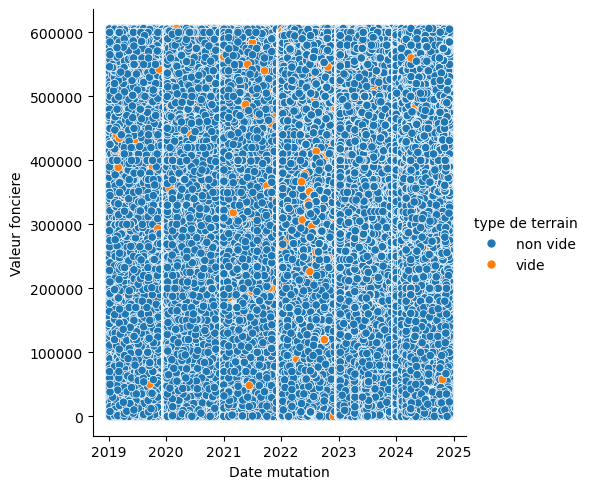

In [ ]:
sns.relplot(data=non_outliers, y='Valeur fonciere', x='Date mutation',hue='type de terrain')


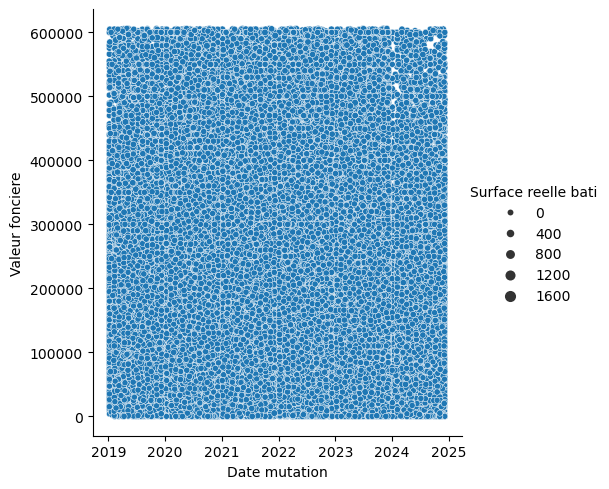

In [ ]:
#Séparer par type local
#Faire une analyse de la surface du batiment de chaque type, par nombre de pièce
#Prendre les appartement et séparer par nombre de pièce puis comparer la surface du batiment (Analyse valeur appartement)

non_outliers['Type local'].unique()
#'0', 'Appartement', 'Dépendance', 'Local industriel. commercial ou assimilé', 'Maison']
df_appartement = non_outliers[non_outliers['Type local']=='Appartement']
sample_apart = df_appartement.sample(frac=0.1, random_state=42)
sns.relplot(data=sample_apart, 
            y='Valeur fonciere', 
            x='Date mutation',size='Surface reelle bati')

## 4 - Conlusion and recommandations ##

Summary of discoveries and investment advice.

Conclusions:
- Summarize significant relationships between variables that impact property values.
- Identify key factors to monitor when predicting property values.

Recommendations:
- Investment advice on what factors to prioritize when evaluating properties (e.g., emphasis on surface area or location).
- Suggestions for investing in areas where the correlation factors are favorable.